In [1]:
import numpy as np
import pandas as pd

In [11]:
# Load the CSV file into a pandas DataFrame, skipping problematic lines
df = pd.read_csv('HousingPrices.csv', on_bad_lines='skip', delimiter=';')
# Display the first few rows of the DataFrame
df.head()

C:\Users\beego\AppData\Local\Temp\ipykernel_18112\4148874215.py:2: DtypeWarning: Columns (31,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HousingPrices.csv', on_bad_lines='skip', delimiter=';')


,MI_OBJ_OIS_PROPERTY_ID,MI_OBJ_OIS_PROPERTY_NUMBER,MI_OBJ_OIS_MOTHER_ID,MI_OBJ_OIS_MUNICIPALITY_NUMBER,MI_OBJ_OIS_POSTAL_CODE,MI_OBJ_OIS_RENTED_PLOT,MI_OBJ_OIS_OWNERSHIP_CODE_PROPERTY,MI_OBJ_OIS_OWNERSHIP_CODE_UNIT,MI_OBJ_OIS_PROPERTY_APPLICATION_CODE_UNIT,MI_OBJ_OIS_PROPERTY_APPLICATION_CODE_BUILDING,...,C20_6MONTH%,C20_12MONTH%,SCHOOL_DISTANCE_1,SCHOOL_DISTANCE_2,SCHOOL_DISTANCE_3,SUPERMARKET_DISTANCE_1,SUPERMARKET_DISTANCE_2,SUPERMARKET_DISTANCE_3,KOEBESUM_BELOEB,OMREGNINGS_DATO
0,360002585,2585.0,0.0,360,4953.0,N,10.0,NaN,120.0,120.0,...,21.54,36.81,5425.42,5778.04,5854.45,5551.78,5852.82,5980.20,1050000,2015-03-24 00:00:00
1,615293071,293071.0,0.0,615,8751.0,N,10.0,NaN,NaN,NaN,...,19.31,22.57,887.08,2542.69,5754.62,1114.38,2760.41,2769.31,450000,2015-03-05 00:00:00
2,860038009,38009.0,0.0,860,9870.0,N,10.0,NaN,NaN,NaN,...,28.53,30.18,1294.14,1294.14,2137.98,861.44,929.94,1058.68,176790,2015-06-22 00:00:00
3,1010000002,2.0,241700.0,101,2300.0,N,10.0,90.0,140.0,140.0,...,28.23,36.60,1045.23,1383.67,1443.80,132.97,323.57,538.37,1352500,2015-06-03 00:00:00
4,1010000004,4.0,241700.0,101,2300.0,N,10.0,90.0,140.0,140.0,...,28.30,36.19,1045.23,1383.67,1443.80,132.97,323.57,538.37,3500000,2015-06-02 00:00:00


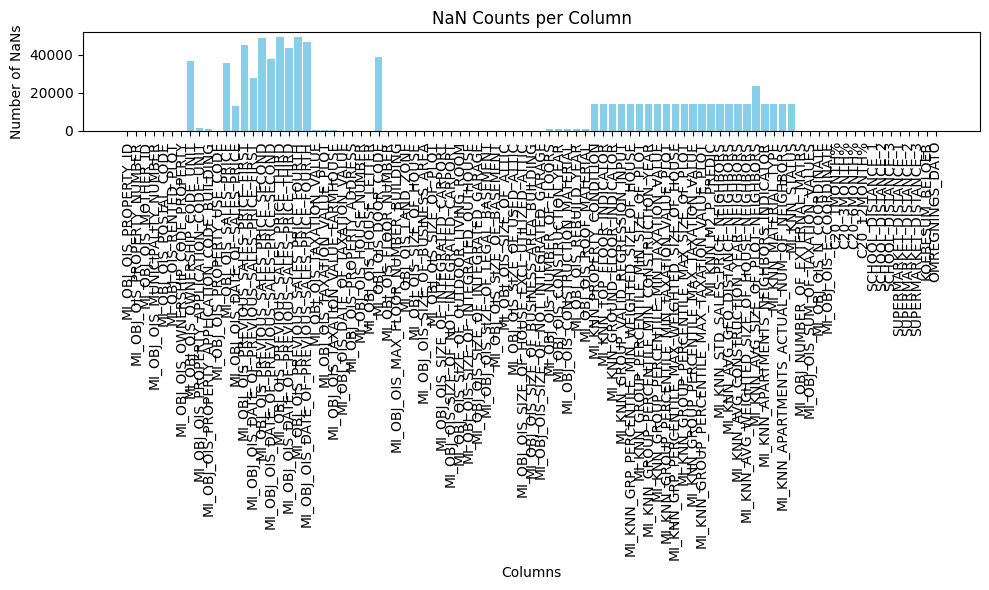

In [3]:
# Visualize the number of NaNs in each column
import matplotlib.pyplot as plt

nan_counts = df.isna().sum()

# Plot the NaN counts
plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of NaNs')
plt.title('NaN Counts per Column')
plt.tight_layout()
plt.show()

In [4]:
# Check for overlap between columns with NaNs and columns in HP_TOP_10_LGBM.csv
# Load the top 10 features dataset
top_10_df = pd.read_csv('HP_TOP_10_LGBM.csv')

# Get columns with NaNs
columns_with_nans = df.columns[df.isna().any()]

# Check for overlap
overlapping_columns = set(columns_with_nans).intersection(top_10_df.columns)

if overlapping_columns:
    print("Overlapping columns with NaNs:", overlapping_columns)
else:
    print("No overlap between columns with NaNs and top 10 features.")

Overlapping columns with NaNs: {'MI_OBJ_OIS_CONSTRUCTION_YEAR', 'MI_OBJ_OIS_SUM_OF_TAXATION_VALUES', 'MI_OBJ_OIS_TAXATION_VALUE_PLOT', 'SUPERMARKET_DISTANCE_1', 'MI_OBJ_OIS_MOTHER_ID', 'MI_OBJ_OIS_TAXATION_VALUE'}


In [5]:
# Calculate the percentage of NaNs in the overlapping columns
if overlapping_columns:
    nan_percentages_overlap = df[list(overlapping_columns)].isna().mean() * 100
    print("Percentage of NaNs in overlapping columns:")
    print(nan_percentages_overlap)
else:
    print("No overlapping columns to calculate NaN percentages.")

Percentage of NaNs in overlapping columns:
MI_OBJ_OIS_CONSTRUCTION_YEAR         2.077543
MI_OBJ_OIS_SUM_OF_TAXATION_VALUES    0.312443
MI_OBJ_OIS_TAXATION_VALUE_PLOT       0.553876
SUPERMARKET_DISTANCE_1               0.075067
MI_OBJ_OIS_MOTHER_ID                 0.008115
MI_OBJ_OIS_TAXATION_VALUE            0.553876
dtype: float64


In [ ]:
# Count columns with over 10% NaNs
columns_over_10_percent_nans = nan_percentages[nan_percentages > 10]

print(f"Number of columns with over 10% NaNs: {len(columns_over_10_percent_nans)}")
print("Columns with over 10% NaNs:")
print(columns_over_10_percent_nans)

In [6]:
# Create a new CSV file where all NaNs are replaced with 0
nan_replaced_df = df.fillna(0)
nan_replaced_df.to_csv('HousingPrices_NoNaNs.csv', index=False)
print("CSV file 'HousingPrices_NoNaNs.csv' created with NaNs replaced by 0.")

CSV file 'HousingPrices_NoNaNs.csv' created with NaNs replaced by 0.


In [13]:
# Remove columns with over 5% NaNs from the original dataset
nan_percentages = (df.isna().sum() / len(df)) * 100  # Ensure nan_percentages is defined
columns_to_keep = nan_percentages[nan_percentages <= 5].index
filtered_df = df[columns_to_keep]

# Save the filtered dataset to a new CSV file
filtered_df.to_csv('HousingPrices_Filtered.csv', index=False)
print("CSV file 'HousingPrices_Filtered.csv' created by removing columns with over 5% NaNs.")

CSV file 'HousingPrices_Filtered.csv' created by removing columns with over 5% NaNs.


In [ ]:
# Create a new dataset by removing rows with any NaNs
rows_before = len(filtered_df)
cleaned_df = filtered_df.dropna()
rows_after = len(cleaned_df)

# Save the cleaned dataset to a new CSV file
cleaned_df.to_csv('HousingPrices_Cleaned.csv', index=False)

# Calculate the percentage of rows removed
percentage_removed = ((rows_before - rows_after) / rows_before) * 100
print(f"CSV file 'HousingPrices_Cleaned.csv' created by removing rows with any NaNs.")
print(f"Percentage of rows removed: {percentage_removed:.2f}%")

CSV file 'HousingPrices_Cleaned.csv' created by removing rows with any NaNs.
Percentage of rows removed: 3.58%


47523